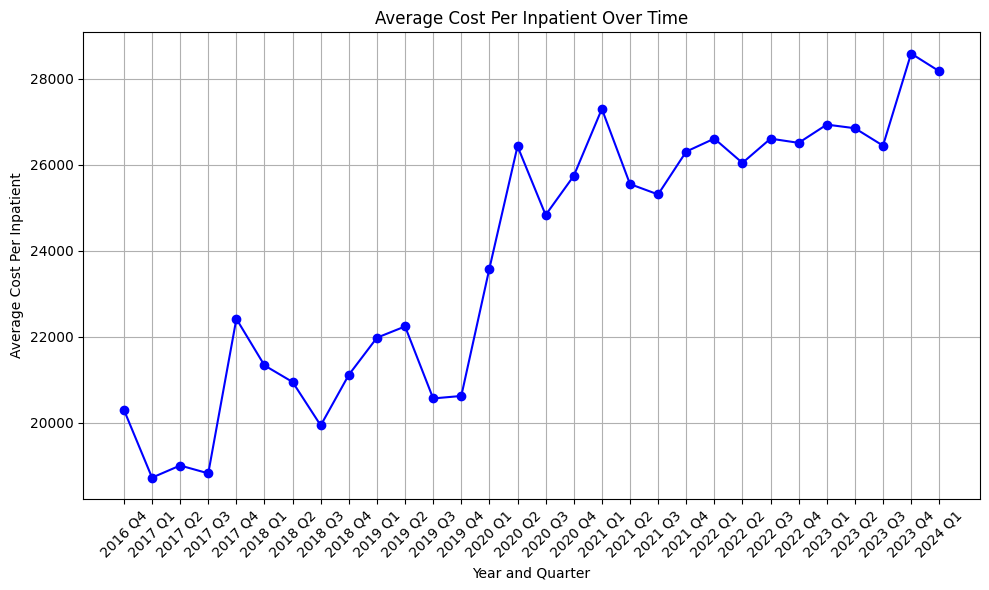

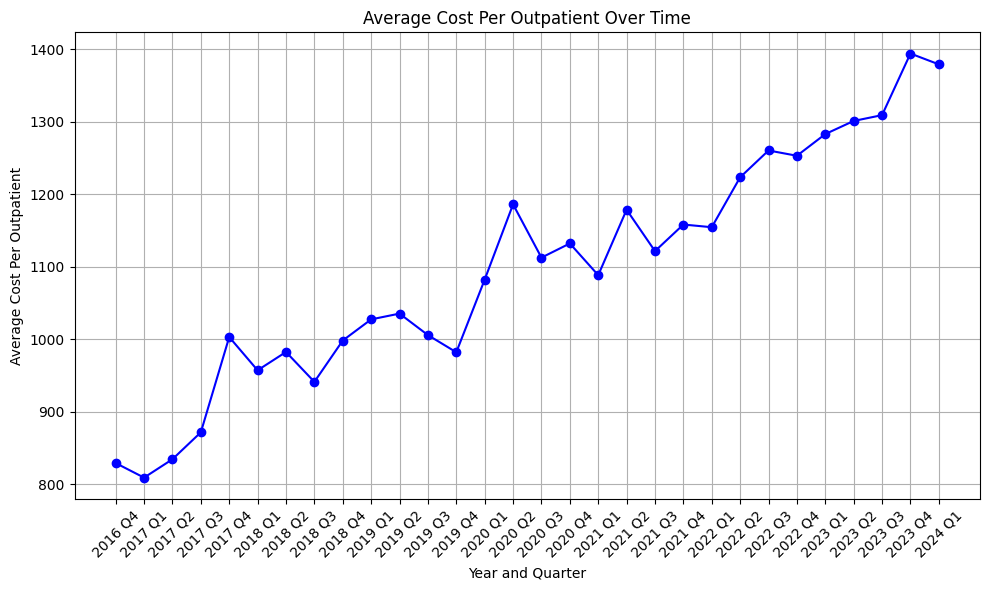

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import os

quarters = ['20164', '20171', '20172', '20173', '20174', '20181', '20182', '20183', '20184', '20191', 
            '20192', '20193', '20194', '20201', '20202', '20203', '20204', '20211', '20212', '20213', 
            '20214', '20221', '20222', '20223', '20224', '20231', '20232', '20233', '20234', '20241']

avg_costs_per_inpatient = []
avg_costs_per_outpatient = []
time_labels = []

for quarter in quarters:
  file_path = f'{quarter}.csv'
  if not os.path.exists(file_path):
    continue

  data = pd.read_csv(file_path)
  
  grossInpatientRevenueTotal = data['GRIP_TOT'].tolist()
  grossOutpatientRevenueTotal = data['GROP_TOT'].tolist()
  netPatientRevenueTotal = data['NET_TOT'].tolist()
  totalInpatients = data['DIS_TOT'].tolist()
  totalOutpatients = data['VIS_TOT'].tolist()


  grossInpatientRevenueTotalCleaned = []
  sum = 0
  numHospitalsWithData = 0
  for x in grossInpatientRevenueTotal:
    if pd.isna(x):
      grossInpatientRevenueTotalCleaned.append(0)
    else:
      if isinstance(x, float):
        x = str(int(x))
      else:
        x = str(x)

      x = x.replace(" ", "").replace(",", "")
      if x != '0':
        grossInpatientRevenueTotalCleaned.append(int(x))
        sum += int(x)
        numHospitalsWithData += 1
      else:
        grossInpatientRevenueTotalCleaned.append(0)


  meanGrossInpatientRevenueTotal = sum / numHospitalsWithData
  grossInpatientRevenueTotalReplaced = [round(meanGrossInpatientRevenueTotal) if x == 0 else x for x in grossInpatientRevenueTotalCleaned]

  grossOutpatientRevenueTotalCleaned = []
  sum = 0
  numHospitalsWithData = 0
  for x in grossOutpatientRevenueTotal:
    if pd.isna(x):
      grossOutpatientRevenueTotalCleaned.append(0)
    else:
      if isinstance(x, float):
        x = str(int(x))
      else:
        x = str(x)

      x = x.replace(" ", "").replace(",", "")
      if x != '0':
        grossOutpatientRevenueTotalCleaned.append(int(x))
        sum += int(x)
        numHospitalsWithData += 1
      else:
        grossOutpatientRevenueTotalCleaned.append(0)

  meanGrossOutpatientRevenueTotal = sum / numHospitalsWithData
  grossOutpatientRevenueTotalReplaced = [round(meanGrossOutpatientRevenueTotal) if x == 0 else x for x in grossOutpatientRevenueTotalCleaned]

  netPatientRevenueTotalCleaned = []
  sum = 0
  numHospitalsWithData = 0
  for x in netPatientRevenueTotal:
    if pd.isna(x):
      netPatientRevenueTotalCleaned.append(0)
    else:
      if isinstance(x, float):
        x = str(int(x))
      else:
        x = str(x)

      x = x.replace(" ", "").replace(",", "").replace("(", "").replace(")", "")
      if x != '0':
        netPatientRevenueTotalCleaned.append(int(x))
        sum += int(x)
        numHospitalsWithData += 1
      else:
        netPatientRevenueTotalCleaned.append(0)

  meanNetPatientRevenueTotal = sum / numHospitalsWithData
  netPatientRevenueTotalReplaced = [round(meanNetPatientRevenueTotal) if x == 0 else x for x in netPatientRevenueTotalCleaned]

  totalInpatientCleaned = []
  sum = 0
  numHospitalsWithData = 0
  for x in totalInpatients:
    if pd.isna(x):
      totalInpatientCleaned.append(0)
    else:
      if isinstance(x, float):
        x = str(int(x))
      else:
        x = str(x)

      x = x.replace(" ", "").replace(",", "")
      if x != '0':
        totalInpatientCleaned.append(int(x))
        sum += int(x)
        numHospitalsWithData += 1
      else:
        totalInpatientCleaned.append(0)

  meanTotalInpatientCleaned = sum / numHospitalsWithData
  totalInpatientReplaced = [round(meanTotalInpatientCleaned) if x == 0 else x for x in totalInpatientCleaned]

  totalOutpatientCleaned = []
  sum = 0
  numHospitalsWithData = 0
  for x in totalOutpatients:
    if pd.isna(x):
      totalOutpatientCleaned.append(0)
    else:
      if isinstance(x, float):
        x = str(int(x))
      else:
        x = str(x)

      x = x.replace(" ", "").replace(",", "")
      if x != '0':
        totalOutpatientCleaned.append(int(x))
        sum += int(x)
        numHospitalsWithData += 1
      else:
        totalOutpatientCleaned.append(0)

  meanTotalOutpatientCleaned = sum / numHospitalsWithData
  totalOutpatientReplaced = [round(meanTotalInpatientCleaned) if x == 0 else x for x in totalOutpatientCleaned]

  netInpatientRevenueSum = 0
  for i in range(len(grossInpatientRevenueTotalReplaced)):
    netInpatientRevenueSum += (grossInpatientRevenueTotalReplaced[i] / (grossInpatientRevenueTotalReplaced[i]
                              + grossOutpatientRevenueTotalReplaced[i]) * netPatientRevenueTotalReplaced[i])
  netInpatientRevenueAvg = netInpatientRevenueSum / len(grossInpatientRevenueTotalReplaced)

  avgCostPerInpatient = netInpatientRevenueAvg / statistics.mean(totalInpatientReplaced)
  
  avg_costs_per_inpatient.append(avgCostPerInpatient)
  year = str(quarter)[:4]
  qtr = " Q" + str(quarter)[-1]
  formatted_quarter = year + qtr
  time_labels.append(formatted_quarter)


  netOutpatientRevenueSum = 0
  for i in range(len(grossOutpatientRevenueTotalReplaced)):
    netOutpatientRevenueSum += (grossOutpatientRevenueTotalReplaced[i] / (grossInpatientRevenueTotalReplaced[i]
                              + grossOutpatientRevenueTotalReplaced[i]) * netPatientRevenueTotalReplaced[i])
  netOutpatientRevenueAvg = netOutpatientRevenueSum / len(grossOutpatientRevenueTotalReplaced)

  avgCostPerOutpatient = netOutpatientRevenueAvg / statistics.mean(totalOutpatientReplaced)
  
  avg_costs_per_outpatient.append(avgCostPerOutpatient)

plt.figure(figsize=(10, 6))
plt.plot(time_labels, avg_costs_per_inpatient, marker='o', linestyle='-', color='b')
plt.xlabel('Year and Quarter')
plt.ylabel('Average Cost Per Inpatient')
plt.title('Average Cost Per Inpatient Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(time_labels, avg_costs_per_outpatient, marker='o', linestyle='-', color='b')
plt.xlabel('Year and Quarter')
plt.ylabel('Average Cost Per Outpatient')
plt.title('Average Cost Per Outpatient Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()